Projet 5 | Catégorisez automatiquement des questions

Partie 1 | Analyse Exploratoire

### Présentation du projet
Nous cherchons a aider la communauté de Stack Overflow, site célèbre de questions-réponses liées au développement informatique, en réalisant un API de prédiction de tags.<br/>
L'analyse se basera sur le NLP (Natural language processing) et nous testerons différentes méthodes pour ne sélectionner que la plus efficace et pertinente.

# Import des packages, fonctions et paramétrage initial

Notebook variables reset for each complete execution of this code :

In [1]:
%reset -f

## Vérification de la version de Python

In [2]:
!python -V

Python 3.11.7


## Import des packages utiles au projet

### Libraries

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\A475388\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\A475388\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\A475388\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# Modules classiques d'analyse exploratoire:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%pylab
%matplotlib inline

# Manipulation fichiers et Interaction avec l'os / notebook
import os
import csv
import requests
import warnings

# Manipulations temporelles
from datetime import datetime
from datetime import date

# Libraries and packages for text (pre-)processing
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
from nltk.stem import PorterStemmer

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings('ignore')

Using matplotlib backend: <object object at 0x00000200E845FD70>
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Mise en page et réglages divers du notebook

In [5]:
# Modification des affichages de colonnes, lignes et largeurs de colonnes pour bien visualiser les colonnes
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', None)

# Affichage avec la bibliothèque graphique intégrée à Notebook:
%matplotlib inline

# Format des graphiques seaborn
sns.set_theme(style="whitegrid")

# Chargement et préparation des données

## Chargement des datasets

In [6]:
# Création des DataFrame
df_stack = pd.read_csv("C:/Users/A475388/Notebooks/IML P5/Data/QueryResults.csv")
df_stack.head(1)

,Title,Body,Tags,CreationDate,AnswerCount,ViewCount,Score
0,Python kernel dies for second run of PyQt5 GUI,"<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n",<python><ipython><anaconda><pyqt5><spyder>,2016-10-17 19:21:55,3,10077,17


In [7]:
df_stack.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score'],
      dtype='object')

In [8]:
df_stack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35018 entries, 0 to 35017
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         35018 non-null  object
 1   Body          35018 non-null  object
 2   Tags          35018 non-null  object
 3   CreationDate  35018 non-null  object
 4   AnswerCount   35018 non-null  int64 
 5   ViewCount     35018 non-null  int64 
 6   Score         35018 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.9+ MB


In [9]:
df_stack['Date'] = pd.to_datetime(df_stack['CreationDate'],
                                  format='%Y-%m-%d %H:%M:%S',
                                  errors = 'coerce')

In [10]:
df_stack.isnull().sum()

Title           0
Body            0
Tags            0
CreationDate    0
AnswerCount     0
ViewCount       0
Score           0
Date            0
dtype: int64

In [11]:
df = df_stack.copy()

# Exploration

## Univarié

In [12]:
CreationDateByDay = df['Date'].dt.date.value_counts()
df_date = CreationDateByDay.to_frame().reset_index()
df_date = df_date.reset_index()
df_date.head()

,index,Date,count
0,0,2014-03-13,47
1,1,2015-04-28,42
2,2,2014-01-28,41
3,3,2014-02-19,40
4,4,2014-04-16,40


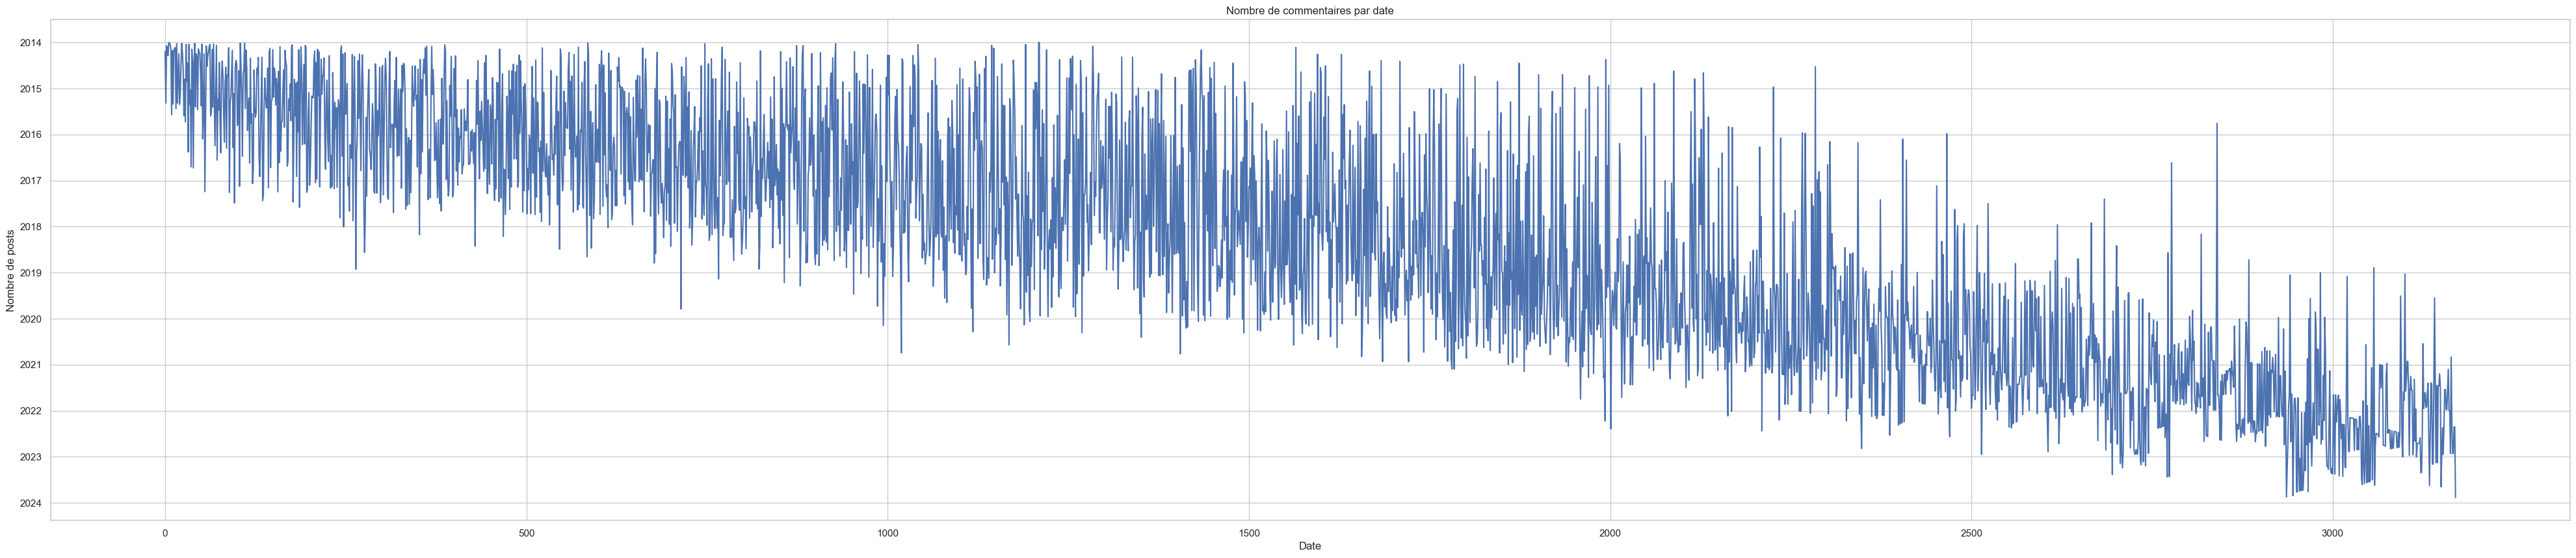

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(50,10))
sns.lineplot(data=df_date, x=df_date['index'], y=df_date['Date'], ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Nombre de posts")
ax.set_title("Nombre de commentaires par date")

plt.show()

In [14]:
df.describe()

,AnswerCount,ViewCount,Score,Date
count,35018.000000,3.501800e+04,35018.000000,35018
mean,4.709892,5.442348e+04,40.647581,2016-11-30 00:56:02.586755584
min,1.000000,1.000100e+04,11.000000,2014-01-01 01:28:32
25%,2.000000,1.705425e+04,15.000000,2015-03-22 05:16:55
50%,3.000000,2.845300e+04,21.000000,2016-08-10 02:59:53
75%,6.000000,5.487400e+04,38.000000,2018-04-08 18:48:51.249999872
max,76.000000,3.486189e+06,5294.000000,2023-11-22 12:21:41
std,4.583556,9.482987e+04,83.174143,NaN


<Axes: xlabel='Score'>

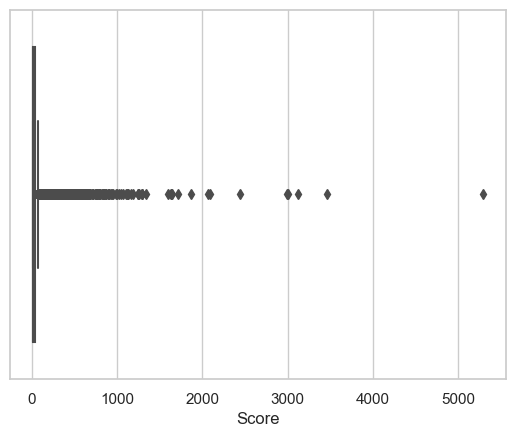

In [15]:
# Analyse du score
sns.boxplot(x=df["Score"])

<Axes: xlabel='AnswerCount'>

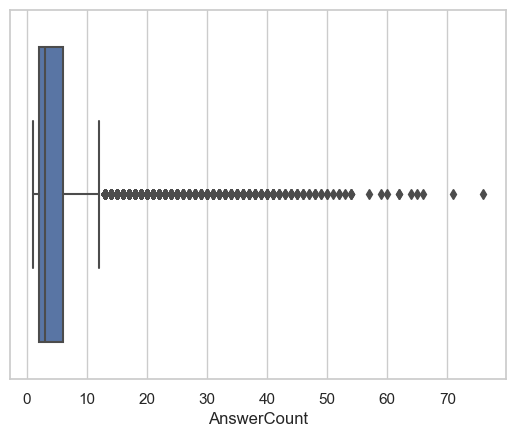

In [16]:
# Analyse du score
sns.boxplot(x=df["AnswerCount"])

<Axes: xlabel='ViewCount'>

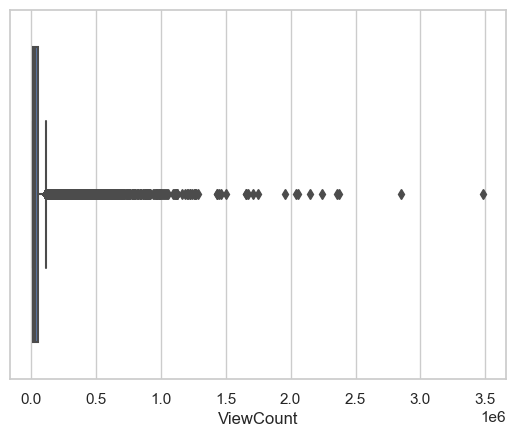

In [17]:
# Analyse du score
sns.boxplot(x=df["ViewCount"])

## Vues par ancienneté

In [18]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date'],
      dtype='object')

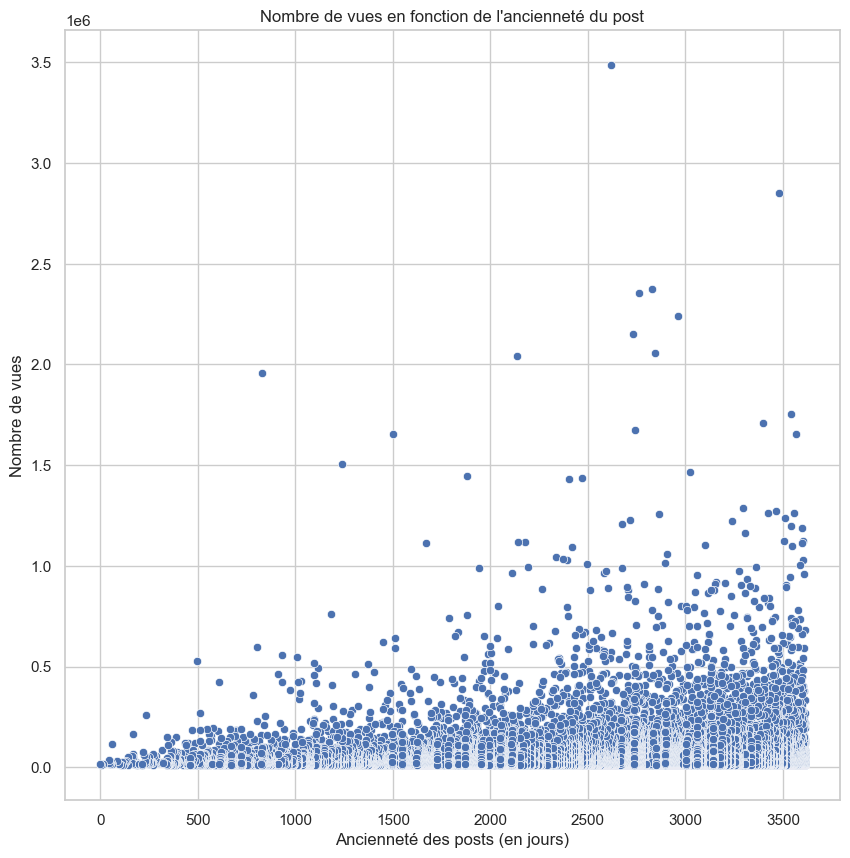

In [19]:
last_post = df["Date"].max()
df["CreationDateTimeDelta"] = last_post - df["Date"]
df["CreationDateTimeDelta"] = df["CreationDateTimeDelta"].dt.days

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
sns.scatterplot(data=df, x="CreationDateTimeDelta", y="ViewCount", ax=ax)
ax.set_xlabel("Ancienneté des posts (en jours)")
ax.set_ylabel("Nombre de vues")
ax.set_title("Nombre de vues en fonction de l'ancienneté du post")
plt.show()

Plus le post est ancien, plus il a de vues.

## Corrélations

In [20]:
def correlations(data, methods):
    """
    Plot correlation matrix for quantitatives values.

    Args:
        data(dataframe): A dataframe

        method(string): Chosen method to compute correlation. Might be "pearson", "spearman" or "kendall"

    Returns:
        Correlation matrix
    """

    correlations = []
    cleanning_masks = []
    for method in methods:
        correlation = data.select_dtypes(include=['int64','float64']).corr(method=method) * 100
        cleanning_mask = np.zeros_like(correlation)
        upper_triangle = np.triu_indices_from(correlation)
        cleanning_mask[upper_triangle] = 1
        correlations.append(correlation)
        cleanning_masks.append(cleanning_mask)


    fig, axes = plt.subplots(nrows=len(methods), figsize=(30,40))
    fig.subplots_adjust(wspace=0.2)

    for i in range(len(axes)):
        sns.heatmap(correlations[i], ax=axes[i], cmap="RdBu_r", mask = cleanning_masks[i],
                   annot = True, fmt=".0f", cbar=False)

        axes[i].set_title(f"Matrice de corrélations de {methods[i]} en %")

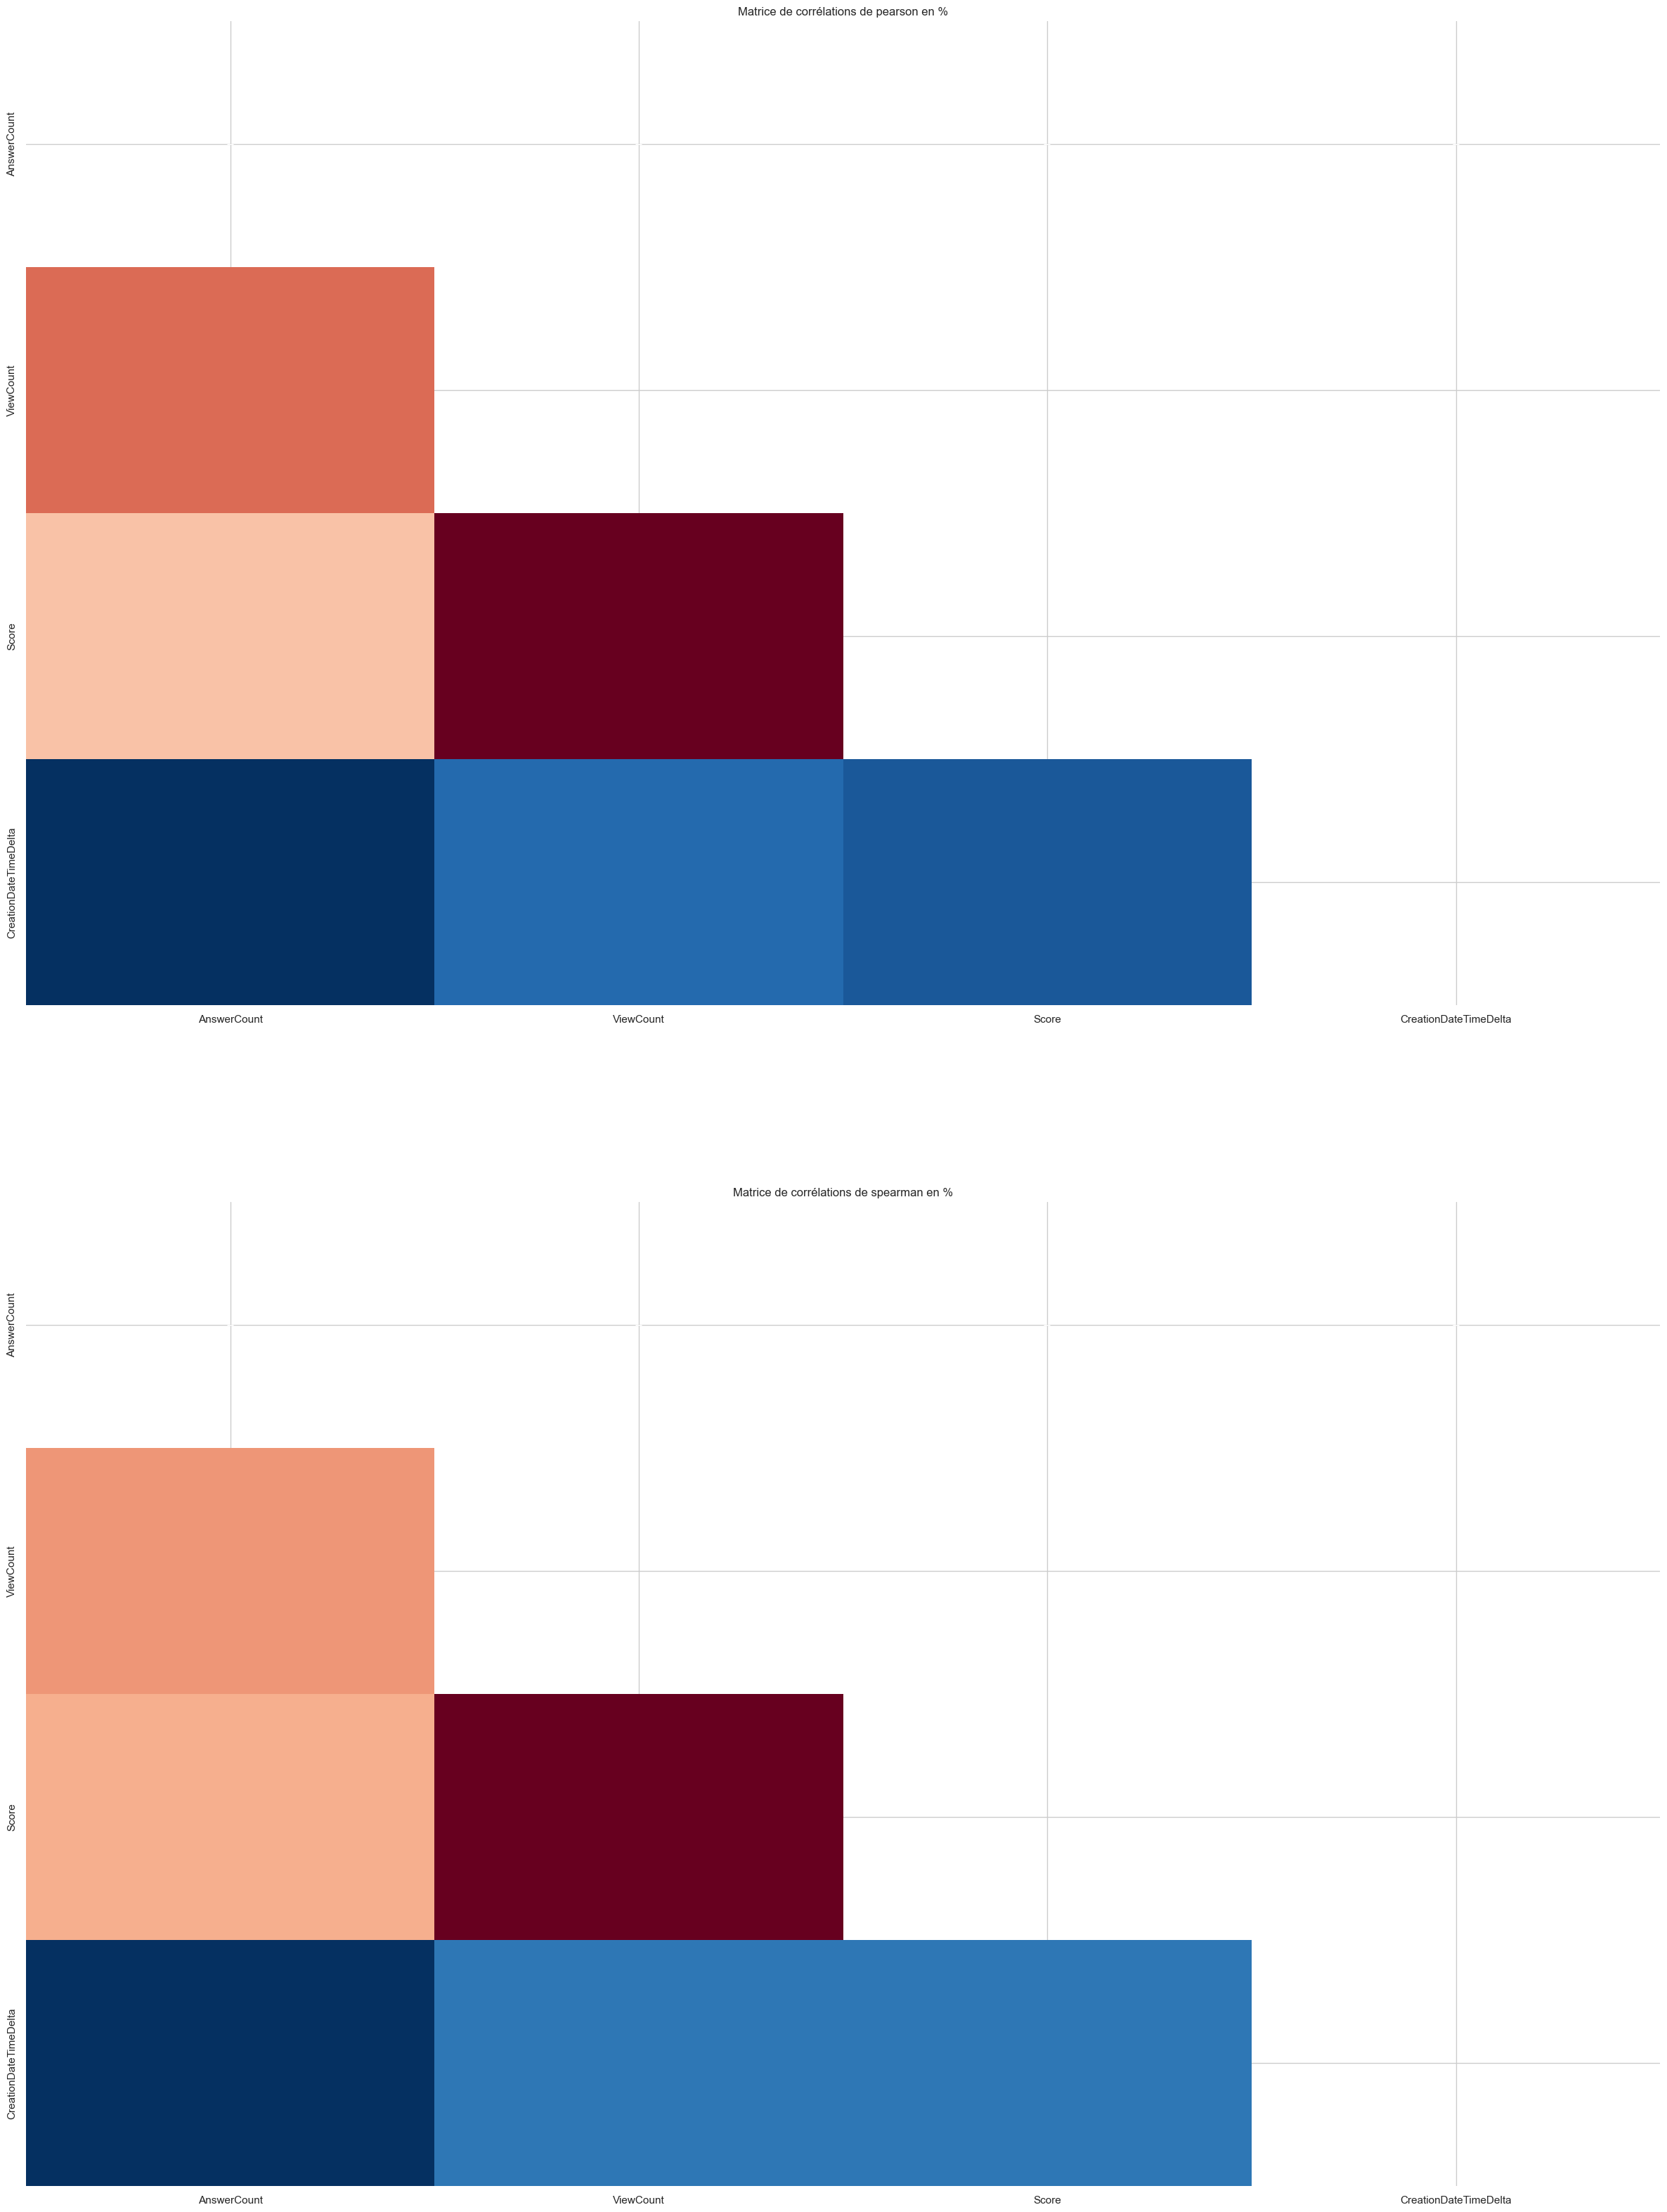

In [21]:
correlations(df,
             methods=["pearson", "spearman"])

# Text cleaning

In [116]:
# On réunit Body et Titre
df['Text_complet'] = df['Title'] + df['Body']
df['Text_complet'].head(1)

0    Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquot

## Remove HTML tags
On supprime les tags HTML présents dans le corps de texte

In [23]:
def remove_html(text):
    """
        Remove the html in sample text
    """
    html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
    return re.sub(html, "", text)

In [24]:
# remove html from the text
df['Text_cleaned'] = df['Text_complet'].apply(lambda x: remove_html(x))
df['Tags_cleaned'] = df['Tags']

In [25]:
df['Tags_cleaned'] = df['Tags_cleaned'].astype(str)
df['Tags_cleaned'] = df['Tags_cleaned'].replace({'<', '>'},' ')
df['Tags_cleaned'][0]

'<python><ipython><anaconda><pyqt5><spyder>'

In [26]:
df['Title_cleaned'] = df['Title'].apply(lambda x: remove_html(x))
df['Title_cleaned'][0]

'Python kernel dies for second run of PyQt5 GUI'

## Cleaning

In [27]:
%%time

def text_cleaning(text):
    """
    Remove figures, punctuation, words shorter than two letters (excepted C or R) in a lowered text.

    Args:
        text(String): Row text to clean

    Returns:
       res(string): Cleaned text
    """

    pattern = re.compile(r'[^\w]|[\d_]')

    try:
        res = re.sub(pattern," ", text).lower()
    except TypeError:
        return text

    res = res.split(" ")
    res = list(filter(lambda x: len(x)>3 , res))
    res = " ".join(res)
    return res

CPU times: total: 0 ns
Wall time: 0 ns


In [28]:
df['Text_cleaned'] = [text_cleaning(text) for text in df['Text_cleaned']]
df['Tags_cleaned'] = [text_cleaning(text).strip() for text in df['Tags_cleaned']]

In [29]:
df['Tags_cleaned'][0]

'python ipython anaconda pyqt spyder'

In [30]:
df['Title_cleaned'] = [text_cleaning(text) for text in df['Title_cleaned']]
df['Title_cleaned'][0]

'python kernel dies second pyqt'

## Remove Non-ASCI

In [31]:
def remove_non_ascii(text):
    """
        Remove non-ASCII characters
    """
    return re.sub(r'[^\x00-\x7f]',r'', text) # or ''.join([x for x in text if x in string.printable])

In [32]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_non_ascii(x))
df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_non_ascii(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_non_ascii(x))

In [33]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Remove special characters

In [34]:
def remove_special_characters(text):
    """
        Remove special special characters, including symbols, emojis, and other graphic characters
    """
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [35]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_special_characters(x))
df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_special_characters(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_special_characters(x))

In [36]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Remove punctuations

In [37]:
def remove_punct(text):
    """
        Remove the punctuation
    """
#     return re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', "", text)
    return text.translate(str.maketrans('', '', string.punctuation))

In [38]:
# remove html from the text
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_punct(x))
#df['Tags_cleaned'] = df['Tags_cleaned'].apply(lambda x: remove_punct(x))

In [39]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [40]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_punct(x))
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Capitalization/ Lower case

In [41]:
df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: x.lower())
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: x.lower())

In [42]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [43]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: x.lower())
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Expand the Contractions

In [44]:
%%time
import contractions

# Test
test_text = """
            Y'all can't expand contractions I'd think. I'd like to know how I'd done that!
            We're going to the zoo and I don't think I'll be home for dinner.
            Theyre going to the zoo and she'll be home for dinner.
            We should've do it in here but we shouldn't've eat it
            """
print("Test: ", contractions.fix(test_text))

df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: contractions.fix(x))
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: contractions.fix(x))
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: contractions.fix(x))

Test:  
            You all cannot expand contractions I would think. I would like to know how I would done that!
            We are going to the zoo and I do not think I will be home for dinner.
            They Are going to the zoo and she will be home for dinner.
            We should have do it in here but we should not have eat it
            
CPU times: total: 1.36 s
Wall time: 1.42 s


In [45]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

## Noise Removal

In [46]:
def remove_URL(text):
    """
        Remove URLs from a sample string
    """
    return re.sub(r"https?://\S+|www\.\S+", "", text)

In [47]:
# remove urls from the text
df["Tags_cleaned"] = df["Tags_cleaned"].apply(lambda x: remove_URL(x))
df['Text_cleaned'] = df['Text_cleaned'].apply(lambda x: remove_URL(x))

In [48]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [49]:
df['Title_cleaned'] = df['Title_cleaned'].apply(lambda x: remove_URL(x))
df['Title_cleaned'].head()

0                 python kernel dies second pyqt
1        optional chaining with arrays functions
2    when apply numeric when astype float python
3                           webpack bundle files
4                       swiftui tappable subtext
Name: Title_cleaned, dtype: object

## Tokenisation
& stop words

In [50]:
%%time
def tokenize(text):
    """
    Tokenize words of a text.

    Args:

        text(String): Row text

    Returns

        res(list): Tokenized string.
    """
    stop_words = set(stopwords.words('english'))
    #stop_words.extend([])

    try:
        res = word_tokenize(text, language='english')
    except TypeError:
        return text

    res = [token for token in res if token not in stop_words]
    return res

CPU times: total: 0 ns
Wall time: 0 ns


In [51]:
df['tokenized_corpus'] = [tokenize(text) for text in df['Text_cleaned']]
df['tokenized_tags'] = [tokenize(text) for text in df["Tags_cleaned"]]

In [53]:
df['Text_cleaned'].head()

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [54]:
df['Tags_cleaned'].head()

0                        python ipython anaconda pyqt spyder
1    javascript arrays typescript function optional chaining
2                        python pandas numpy dataframe types
3                 javascript node reactjs typescript webpack
4                                   swift xcode text swiftui
Name: Tags_cleaned, dtype: object

In [55]:
df['tokenized_tags'].head()

0                         [python, ipython, anaconda, pyqt, spyder]
1    [javascript, arrays, typescript, function, optional, chaining]
2                         [python, pandas, numpy, dataframe, types]
3                  [javascript, node, reactjs, typescript, webpack]
4                                     [swift, xcode, text, swiftui]
Name: tokenized_tags, dtype: object

In [56]:
df['Title_cleaned'] = [tokenize(text) for text in df['Title_cleaned']]
df['Title_cleaned'].head()

0       [python, kernel, dies, second, pyqt]
1    [optional, chaining, arrays, functions]
2    [apply, numeric, astype, float, python]
3                   [webpack, bundle, files]
4               [swiftui, tappable, subtext]
Name: Title_cleaned, dtype: object

## Lemmatisation

In [57]:
%%time
def lemmatization(tokens):
    """
    Transform tokens into lems

    Args:
        tokens(list): List of tokens

    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    lemmatizer = WordNetLemmatizer()
    lemmatized = []

    for token in tokens:
        lemmatized.append(lemmatizer.lemmatize(token))

    return lemmatized

CPU times: total: 0 ns
Wall time: 0 ns


In [58]:
%%time
df['lemmatized_corpus'] = [lemmatization(tokens) for tokens in df['tokenized_corpus']]
df['lemmatized_tags'] = [lemmatization(tokens) for tokens in df['tokenized_tags']]

CPU times: total: 10.8 s
Wall time: 11.1 s


In [59]:
df['Title_cleaned'] = [lemmatization(tokens) for tokens in df['Title_cleaned']]
df['Title_cleaned'].head()

0         [python, kernel, dy, second, pyqt]
1      [optional, chaining, array, function]
2    [apply, numeric, astype, float, python]
3                    [webpack, bundle, file]
4               [swiftui, tappable, subtext]
Name: Title_cleaned, dtype: object

In [60]:
df[['Text_cleaned', 'tokenized_corpus', 'lemmatized_corpus']].head(2)

,Text_cleaned,tokenized_corpus,lemmatized_corpus
0,python kernel dies second pyqt using spyder python anaconda windows package first window opens expected nothing opens receiving kernel died restarting message import from pyqt qtwidgets import qapplication qwidget qapplication argv qwidget resize show exit exec exec iphython runfile work python testproj wdir work python testproj runfile work python testproj wdir work python testproj kernel died restarting kernel died restarting kernel died restarting kernel dies solve doing same even using exit exec last line,"[python, kernel, dies, second, pyqt, using, spyder, python, anaconda, windows, package, first, window, opens, expected, nothing, opens, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dies, solve, even, using, exit, exec, last, line]","[python, kernel, dy, second, pyqt, using, spyder, python, anaconda, window, package, first, window, open, expected, nothing, open, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dy, solve, even, using, exit, exec, last, line]"
1,optional chaining with arrays functions trying optional chaining with array instead object sure that here what trying myarray filter testkey mytestkey also trying similar thing with function null console giving similar error optional chaining with array function,"[optional, chaining, arrays, functions, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[optional, chaining, array, function, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]"


In [61]:
df.columns

Index(['Title', 'Body', 'Tags', 'CreationDate', 'AnswerCount', 'ViewCount',
       'Score', 'Date', 'CreationDateTimeDelta', 'Text_complet',
       'Text_cleaned', 'Tags_cleaned', 'Title_cleaned', 'tokenized_corpus',
       'tokenized_tags', 'lemmatized_corpus', 'lemmatized_tags'],
      dtype='object')

In [62]:
df[['Tags', 'Tags_cleaned', 'tokenized_tags', 'lemmatized_tags']].head(2)

,Tags,Tags_cleaned,tokenized_tags,lemmatized_tags
0,<python><ipython><anaconda><pyqt5><spyder>,python ipython anaconda pyqt spyder,"[python, ipython, anaconda, pyqt, spyder]","[python, ipython, anaconda, pyqt, spyder]"
1,<javascript><arrays><typescript><function><optional-chaining>,javascript arrays typescript function optional chaining,"[javascript, arrays, typescript, function, optional, chaining]","[javascript, array, typescript, function, optional, chaining]"


In [63]:
df['lemmatized_tags'] = df['lemmatized_tags'].replace({'<', '>'},'')

In [64]:
df[['Tags', 'Tags_cleaned', 'tokenized_tags', 'lemmatized_tags']].head(2)

,Tags,Tags_cleaned,tokenized_tags,lemmatized_tags
0,<python><ipython><anaconda><pyqt5><spyder>,python ipython anaconda pyqt spyder,"[python, ipython, anaconda, pyqt, spyder]","[python, ipython, anaconda, pyqt, spyder]"
1,<javascript><arrays><typescript><function><optional-chaining>,javascript arrays typescript function optional chaining,"[javascript, arrays, typescript, function, optional, chaining]","[javascript, array, typescript, function, optional, chaining]"


## Stemming

In [65]:
%%time
def stemming(tokens):
    """
    Transform tokens into lems

    Args:
        tokens(list): List of tokens

    Returns:
        lemmatized(list): List of lemmatized tokens
    """
    stemming = PorterStemmer()
    stemmed = []

    for token in tokens:
        stemmed.append(stemming.stem(token))

    return stemmed

CPU times: total: 0 ns
Wall time: 0 ns


In [66]:
%%time
df['stemmed_corpus'] = [stemming(tokens) for tokens in df['tokenized_corpus']]
df['stemmed_tags'] = [stemming(tokens) for tokens in df['tokenized_tags']]

CPU times: total: 48.7 s
Wall time: 50 s


In [67]:
df['Title_cleaned'] = [stemming(tokens) for tokens in df['Title_cleaned']]
df['Title_cleaned'].head()

0      [python, kernel, dy, second, pyqt]
1        [option, chain, array, function]
2    [appli, numer, astyp, float, python]
3                  [webpack, bundl, file]
4             [swiftui, tappabl, subtext]
Name: Title_cleaned, dtype: object

In [68]:
df[['Text_complet', 'tokenized_corpus', 'stemmed_corpus', 'Text_cleaned']].head(2)

,Text_complet,tokenized_corpus,stemmed_corpus,Text_cleaned
0,"Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n","[python, kernel, dies, second, pyqt, using, spyder, python, anaconda, windows, package, first, window, opens, expected, nothing, opens, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dies, solve, even, using, exit, exec, last, line]","[python, kernel, die, second, pyqt, use, spyder, python, anaconda, window, packag, first, window, open, expect, noth, open, receiv, kernel, die, restart, messag, import, pyqt, qtwidget, import, qapplic, qwidget, qapplic, argv, qwidget, resiz, show, exit, exec, exec, iphython, runfil, work, python, testproj, wdir, work, python, testproj, runfil, work, python, testproj, wdir, work, python, testproj, kernel, die, restart, kernel, die, restart, kernel, die, restart, kernel, die, solv, even, use, exit, exec, last, line]",python kernel dies second pyqt using spyder python anaconda windows package first window opens expected nothing opens receiving kernel died restarting message import from pyqt qtwidgets import qapplication qwidget qapplication argv qwidget resize show exit exec exec iphython runfile work python testproj wdir work python testproj runfile work python testproj wdir work python testproj kernel died restarting kernel died restarting kernel died restarting kernel dies solve doing same even using exit exec last line
1,"How can I use optional chaining with arrays and functions?<p>I'm trying to use optional chaining with an array instead of an object but not sure how to do that:</p>\n<p>Here's what I'm trying to do <code>myArray.filter(x =&gt; x.testKey === myTestKey)?[0]</code>.\nAlso trying similar thing with a function:</p>\n<pre><code>let x = {a: () =&gt; {}, b: null}\nconsole.log(x?b());\n</code></pre>\n<p>But it's giving a similar error - how can I use optional chaining with an array or a function?</p>\n","[optional, chaining, arrays, functions, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[option, chain, array, function, tri, option, chain, array, instead, object, sure, tri, myarray, filter, testkey, mytestkey, also, tri, similar, thing, function, null, consol, give, similar, error, option, chain, array, function]",optional chaining with arrays functions trying optional chaining with array instead object sure that here what trying myarray filter testkey mytestkey also trying similar thing with function null console giving similar error optional chainin

In [69]:
df['stemmed_corpus'].head()

0                                                                                                                                                                                                                                                     [python, kernel, die, second, pyqt, use, spyder, python, anaconda, window, packag, first, window, open, expect, noth, open, receiv, kernel, die, restart, messag, import, pyqt, qtwidget, import, qapplic, qwidget, qapplic, argv, qwidget, resiz, show, exit, exec, exec, iphython, runfil, work, python, testproj, wdir, work, python, testproj, runfil, work, python, testproj, wdir, work, python, testproj, kernel, die, restart, kernel, die, restart, kernel, die, restart, kernel, die, solv, even, use, exit, exec, last, line]
1                                                                                                                                                                                                                                        

In [70]:
df[['Text_complet', 'tokenized_corpus', 'stemmed_corpus', 'Text_cleaned']].head(2)

,Text_complet,tokenized_corpus,stemmed_corpus,Text_cleaned
0,"Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n","[python, kernel, dies, second, pyqt, using, spyder, python, anaconda, windows, package, first, window, opens, expected, nothing, opens, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dies, solve, even, using, exit, exec, last, line]","[python, kernel, die, second, pyqt, use, spyder, python, anaconda, window, packag, first, window, open, expect, noth, open, receiv, kernel, die, restart, messag, import, pyqt, qtwidget, import, qapplic, qwidget, qapplic, argv, qwidget, resiz, show, exit, exec, exec, iphython, runfil, work, python, testproj, wdir, work, python, testproj, runfil, work, python, testproj, wdir, work, python, testproj, kernel, die, restart, kernel, die, restart, kernel, die, restart, kernel, die, solv, even, use, exit, exec, last, line]",python kernel dies second pyqt using spyder python anaconda windows package first window opens expected nothing opens receiving kernel died restarting message import from pyqt qtwidgets import qapplication qwidget qapplication argv qwidget resize show exit exec exec iphython runfile work python testproj wdir work python testproj runfile work python testproj wdir work python testproj kernel died restarting kernel died restarting kernel died restarting kernel dies solve doing same even using exit exec last line
1,"How can I use optional chaining with arrays and functions?<p>I'm trying to use optional chaining with an array instead of an object but not sure how to do that:</p>\n<p>Here's what I'm trying to do <code>myArray.filter(x =&gt; x.testKey === myTestKey)?[0]</code>.\nAlso trying similar thing with a function:</p>\n<pre><code>let x = {a: () =&gt; {}, b: null}\nconsole.log(x?b());\n</code></pre>\n<p>But it's giving a similar error - how can I use optional chaining with an array or a function?</p>\n","[optional, chaining, arrays, functions, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[option, chain, array, function, tri, option, chain, array, instead, object, sure, tri, myarray, filter, testkey, mytestkey, also, tri, similar, thing, function, null, consol, give, similar, error, option, chain, array, function]",optional chaining with arrays functions trying optional chaining with array instead object sure that here what trying myarray filter testkey mytestkey also trying similar thing with function null console giving similar error optional chainin

In [71]:
df['stemmed_tags'].head()

0                   [python, ipython, anaconda, pyqt, spyder]
1    [javascript, array, typescript, function, option, chain]
2                      [python, panda, numpi, datafram, type]
3             [javascript, node, reactj, typescript, webpack]
4                               [swift, xcode, text, swiftui]
Name: stemmed_tags, dtype: object

## Jointure

In [72]:
def body_join(text):
    text=' '.join(text)
    return text

## Preproc final

In [74]:
print(f"Observations restante du corpus original: {df.shape[0]}")

joined_corpus = [" ".join(text) for text in df['lemmatized_corpus']]
corpus_df = pd.DataFrame(joined_corpus, columns=['preprocessed_text'])
corpus_df['len_text'] = corpus_df['preprocessed_text'].apply(lambda x: len(x))

joined_titles = [" ".join(tags) for tags in df['Title_cleaned']]
title_df = pd.DataFrame(joined_titles, columns=['preprocessed_titles'])
title_df['len_titles'] = title_df['preprocessed_titles'].apply(lambda x: len(x))

joined_tags = [" ".join(tags) for tags in df['lemmatized_tags']]
tag_df = pd.DataFrame(joined_tags, columns=['preprocessed_tags'])
tag_df['len_tags'] = tag_df['preprocessed_tags'].apply(lambda x: len(x))

corpus_tag_df = pd.concat([corpus_df, title_df, tag_df], axis=1)

empty_data_idx = corpus_tag_df[((corpus_tag_df['len_text']==0) | (corpus_tag_df['len_titles']==0) | (corpus_tag_df['len_tags']==0))].index

corpus_tag_df.drop(index=empty_data_idx, inplace=True)
df.drop(index=empty_data_idx, inplace=True)

print(f"observations restantes du corpus traité: {corpus_tag_df.shape[0]}")

corpus_tag_df['splitted_text'] = corpus_tag_df['preprocessed_text'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_title'] = corpus_tag_df['preprocessed_titles'].apply(lambda x: x.split(' ') )
corpus_tag_df['splitted_tags'] = corpus_tag_df['preprocessed_tags'].apply(lambda x: x.split(' ') )

filtered_corpus = corpus_tag_df['splitted_text'].to_list()
filtered_title = corpus_tag_df['splitted_title'].to_list()
filtered_tags = corpus_tag_df['splitted_tags'].to_list()
filtered_original_posts = df['Text_complet'].to_list()

filtered_tokenized_vs_original = pd.concat([df['Text_complet'],
                                            corpus_tag_df['splitted_text'],
                                            corpus_tag_df['splitted_title'],
                                            corpus_tag_df['splitted_tags']],
                                            axis=1)

#filtered_tokenized_vs_original.to_csv("./data/cleaned_corpus.csv", index=False)
#filtered_tokenized_vs_original.to_pickle('./data/cleaned_corpus.pkl')

Observations restante du corpus original: 35018
observations restantes du corpus traité: 34973


In [75]:
filtered_tokenized_vs_original.head(2)

,Text_complet,splitted_text,splitted_title,splitted_tags
0,"Python kernel dies for second run of PyQt5 GUI<ul>\n<li>Using Spyder in Python 3.5.2 |Anaconda 4.2.0 (64-bit) Windows package. qt: 5.6.0</li>\n<li>For first run, GUI window opens as expected</li>\n<li>For 2nd run, nothing opens, and receiving <strong>Kernel died, restarting</strong> log message.</li>\n</ul>\n\n<p><strong>gui1.py:</strong></p>\n\n<blockquote>\n<pre><code>import sys from PyQt5.QtWidgets import QApplication, QWidget\n\napp = QApplication(sys.argv)\n\nw = QWidget()\n\nw.resize(250,150) w.show()\n\n#sys.exit(app.exec_()) \napp.exec_()\n</code></pre>\n</blockquote>\n\n<p><strong>IPhython log:</strong></p>\n\n<pre><code>runfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nrunfile('F:/work/ws_python/TestProj1/gui1/gui1.py', wdir='F:/work/ws_python/TestProj1/gui1')\n\nKernel died, restarting\n\nKernel died, restarting\n\nKernel died, restarting\n</code></pre>\n\n<p>Why kernel dies for 2nd run and how to solve it?</p>\n\n<blockquote>\n <p>(Doing the same even using #sys.exit(app.exec_()) as last line.)</p>\n</blockquote>\n","[python, kernel, dy, second, pyqt, using, spyder, python, anaconda, window, package, first, window, open, expected, nothing, open, receiving, kernel, died, restarting, message, import, pyqt, qtwidgets, import, qapplication, qwidget, qapplication, argv, qwidget, resize, show, exit, exec, exec, iphython, runfile, work, python, testproj, wdir, work, python, testproj, runfile, work, python, testproj, wdir, work, python, testproj, kernel, died, restarting, kernel, died, restarting, kernel, died, restarting, kernel, dy, solve, even, using, exit, exec, last, line]","[python, kernel, dy, second, pyqt]","[python, ipython, anaconda, pyqt, spyder]"
1,"How can I use optional chaining with arrays and functions?<p>I'm trying to use optional chaining with an array instead of an object but not sure how to do that:</p>\n<p>Here's what I'm trying to do <code>myArray.filter(x =&gt; x.testKey === myTestKey)?[0]</code>.\nAlso trying similar thing with a function:</p>\n<pre><code>let x = {a: () =&gt; {}, b: null}\nconsole.log(x?b());\n</code></pre>\n<p>But it's giving a similar error - how can I use optional chaining with an array or a function?</p>\n","[optional, chaining, array, function, trying, optional, chaining, array, instead, object, sure, trying, myarray, filter, testkey, mytestkey, also, trying, similar, thing, function, null, console, giving, similar, error, optional, chaining, array, function]","[option, chain, array, function]","[javascript, array, typescript, function, optional, chaining]"


# Analyse

In [76]:
%%time
def build_word_distribution(corpus):
    """
    Build corpus word distribution

    Args:
        Corpus(List of lists): Original corpus

    Returns:

        word_dist_df(DataFrame): Word distribution of the corpus
    """
    word_corpus = [token for token_list in corpus for token in token_list]
    word_dist = FreqDist(word_corpus)
    word_dist_df = pd.DataFrame(word_dist.items(), columns=['Word', 'Frequency']).set_index('Word')
    word_dist_df.sort_values("Frequency", ascending=False, inplace=True)

    return word_dist_df

CPU times: total: 0 ns
Wall time: 0 ns


## Distribution dans le corpus

In [77]:
corpus = df['lemmatized_corpus'].to_list()

word_dist = build_word_distribution(corpus)

print(f"{word_dist.shape[0]} tokens différents dans le corpus")
print("10 tokens les plus utilisés :")
display(word_dist.head(10))

158870 tokens différents dans le corpus
10 tokens les plus utilisés :


,Frequency
Word,
java,37847
error,34702
file,34029
using,28554
class,27153
android,26790
name,24729
http,23093
user,22912


<class 'str'>


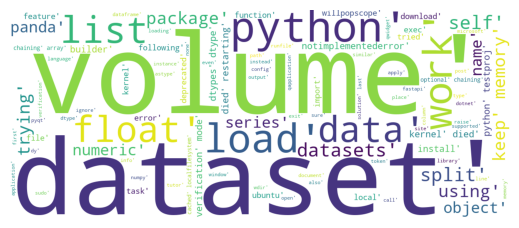

In [78]:
dataset_words=''.join(list(str(df['lemmatized_corpus'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Distribution des titres

In [79]:
titles = df['Title_cleaned'].to_list()

titles_dist = build_word_distribution(titles)

print(f"{titles_dist.shape[0]} 'mots' différents dans les titres")
print("20 mots les plus utilisés dans les titres :")
display(titles_dist.head(20))

11249 'mots' différents dans les titres
20 mots les plus utilisés dans les titres :


,Frequency
Word,
use,3056
error,2388
file,1997
python,1642
android,1470
spring,1328
test,1019
data,1015
work,979


In [80]:
titles_dist_df = pd.DataFrame(titles_dist)
titles_dist_df = titles_dist_df.reset_index()
titles_dist_df

,Word,Frequency
0,use,3056
1,error,2388
2,file,1997
3,python,1642
4,android,1470
...,...,...
11244,componentpublicinst,1
11245,swig,1
11246,dpiawar,1
11247,getmultilinemessag,1


In [81]:
vocabulary_title = titles_dist_df['Word']

In [82]:
vocabulary_title[:20]

0          use
1        error
2         file
3       python
4      android
5       spring
6         test
7         data
8         work
9        react
10        valu
11        type
12        java
13      object
14    function
15      instal
16       creat
17        fail
18      differ
19        json
Name: Word, dtype: object

In [83]:
dataset_words=''.join(list(str(df['Title_cleaned'].values)))
dataset_words

"[list(['python', 'kernel', 'dy', 'second', 'pyqt'])\n list(['option', 'chain', 'array', 'function'])\n list(['appli', 'numer', 'astyp', 'float', 'python']) ...\n list(['notimplementederror', 'load', 'dataset', 'cach', 'localfilesystem', 'support'])\n list(['unabl', 'locat', 'packag', 'dotnet'])\n list(['willpopscop', 'deprec', 'flutter'])]"

<class 'str'>


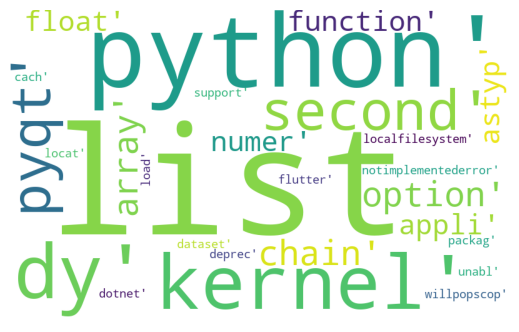

In [84]:
#dataset_words=''.join(list(str(df['Title_cleaned'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 800, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

## Distribution des tags

In [85]:
tags = df['lemmatized_tags'].to_list()

tag_dist = build_word_distribution(tags)

print(f"{tag_dist.shape[0]} tags différents")
print("10 tags les plus utilisés :")
display(tag_dist.head(10))

7573 tags différents
10 tags les plus utilisés :


,Frequency
Word,
python,7927
android,7149
java,5038
javascript,4809
spring,4119
node,2024
core,1969
angular,1901
google,1854


In [86]:
tag_dist.describe()

,Frequency
count,7573.000000
mean,25.485013
std,183.240485
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,7927.000000


75% des tags sont utilisés moins de 8 fois. </br>
Seuls 25% des tags (soit 1893 tags) sont utilisés plus de 8 fois. </br>
Gardons les 5% des tags les plus utilisés soit ~ 400 tags

<class 'str'>


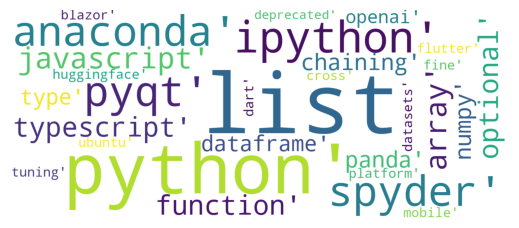

In [87]:
dataset_words=''.join(list(str(df['lemmatized_tags'].values)))
print(type(dataset_words))
wordcloud = WordCloud(width = 1200, height = 500,
                background_color ='white',
                min_font_size = 10).generate(dataset_words)

plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [88]:
m = 50
first_m_tags = tag_dist[0:m].index.to_list()

In [89]:
len(first_m_tags)

50

In [90]:
print(f"Nombre de posts dans fichier de base: {df.shape[0]}")

filtered_df = df.copy()
filtered_df['tags_in_top_m'] = filtered_df['lemmatized_tags'].apply(lambda tags: [tag for tag in tags if tag in first_m_tags])

filtered_df['len_tags_in_top_m'] = filtered_df['tags_in_top_m'].apply(lambda x: len(x))
missing_filtered_data = filtered_df[filtered_df['len_tags_in_top_m'] == 0].index

filtered_df.drop(index=missing_filtered_data, inplace=True)
df.drop(index=missing_filtered_data, inplace=True)
print(f"Observations restantes dans le coprus traité: {filtered_df.shape[0]}")

top_m_corpus = filtered_df['lemmatized_corpus'].to_list()
top_m_joined_corpus = filtered_df['lemmatized_corpus'].to_list()
top_m_tags = filtered_df['tags_in_top_m'].to_list()

Nombre de posts dans fichier de base: 34973
Observations restantes dans le coprus traité: 29995


# Exports

In [91]:
tag_dist = tag_dist.reset_index()
tag_dist.to_csv('C:/Users/A475388/Notebooks/IML P5/Data/tag_dist.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

In [93]:
# Sélection des features à exporter
df_cleaned = df[['Title', 'Body', 'Tags','lemmatized_corpus', 'lemmatized_tags',
       'stemmed_corpus', 'stemmed_tags']].copy()

In [94]:
df_cleaned.to_csv('C:/Users/A475388/Notebooks/IML P5/Data/df_cleaned.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

# Feature engineering

In [95]:
vocabulary = list(word_dist[word_dist["Frequency"]>=1000].index)
len(vocabulary)

725

In [96]:
corpus = df['lemmatized_corpus'].apply(lambda x: ' '.join(x))

## Bag of words
CountVectorizer

In [97]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
vectorizer = CountVectorizer(vocabulary=vocabulary)
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()

array(['java', 'error', 'file', 'using', 'class', 'android', 'name',
       'http', 'user', 'data', 'code', 'return', 'test', 'public',
       'import', 'string', 'version', 'like', 'type', 'value', 'function',
       'module', 'python', 'build', 'work', 'project', 'true', 'server',
       'method', 'want', 'package', 'request', 'application', 'self',
       'object', 'line', 'node', 'following', 'json', 'image', 'would',
       'model', 'service', 'core', 'springframework', 'tried', 'text',
       'path', 'time', 'trying', 'example', 'view', 'need', 'spring',
       'system', 'problem', 'create', 'main', 'react', 'dependency',
       'found', 'result', 'also', 'client', 'html', 'apache', 'message',
       'find', 'content', 'private', 'null', 'component', 'default',
       'option', 'script', 'gradle', 'library', 'call', 'false', 'item',
       'make', 'command', 'internal', 'void', 'list', 'know', 'install',
       'window', 'support', 'response', 'context', 'info', 'could',
       '

In [98]:
bag_of_words_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de Bag of words")
display(bag_of_words_data.sample(10))
print(f" Nombre d'observations: {bag_of_words_data.shape[0]}, nombre de variables: {bag_of_words_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de Bag of words


,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
2688,0,0,0,0,0,0,0,2,0,0,3,0,0,0,0,0,0,0,1,0,4,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,2,0,1,0,2,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
23179,0,0,0,0,0,0,0,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2661,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
24028,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,0,0,2,4,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17861,0,0,0,0,0,0,0,2,0,4,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3821,2,0,3,3,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4994,0,0,0,0,0,0,0,0,0,0,0,1,1,0,2,0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,

 Nombre d'observations: 29995, nombre de variables: 725


In [99]:
bag_of_words_data.describe()

,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000

## TF-IDF

### Vectorisation

In [100]:
%%time
tfidf_vectorizer = TfidfVectorizer(vocabulary=vocabulary)
X = tfidf_vectorizer.fit_transform(corpus)
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

CPU times: total: 1.47 s
Wall time: 1.49 s


In [101]:
tfidf_data = pd.DataFrame(X.toarray(), columns=vocabulary)
print("Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF")
display(tfidf_data.sample(10))
print(f" Nombre d'observations: {tfidf_data.shape[0]}, nombre de variables: {tfidf_data.shape[1]}")

Affichage des 10 premiers posts vectorisés via le modèle de TF-IDF


,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
28787,0.070449,0.000000,0.050036,0.038403,0.000000,0.147297,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.376978,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050959,0.126008,0.00000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.00000,0.068711,0.000000,0.00000,0.000000,0.075627,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.07656,0.116800,0.0,0.0,0.058982,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.059860,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.368322,0.000000,0.399713,0.0,0.000000,0.000000,0.0,0.063786,0.073341,0.000000,0.0,0.0,0.061615,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.113761,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
806,0.000000,0.059191,0.044437,0.017053,0.000000,0.000000,0.000000,0.140759,0.026139,0.000000,0.000000,0.047423,0.000000,0.000000,0.055621,0.000000,0.0,0.061926,0.000000,0.000000,0.026231,0.000000,0.030710,0.000000,0.045257,0.000000,0.00000,0.0,0.000000,0.000000,0.0,0.247491,0.0,0.000000,0.00000,0.000000,0.105886,0.00000,0.030613,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.04906,0.000000,0.0,0.057936,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.000000,0.032043,0.0,0.0,0.028383,0.000000,0.026581,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.130844,0.034255,0.000000,0.0,0.000000,0.000000,0.0,0.056649,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.139695,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.095027,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.439221,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058613,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323564,0.205341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.044998,0.000000,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000
2121,0.000000,0.000000,0.000000,0.000000,0.091264,0.000000,0.000000,

 Nombre d'observations: 29995, nombre de variables: 725


In [102]:
tfidf_data.describe()

,java,error,file,using,class,android,name,http,user,data,code,return,test,public,import,string,version,like,type,value,function,module,python,build,work,project,true,server,method,want,package,request,application,self,object,line,node,following,json,image,would,model,service,core,springframework,tried,text,path,time,trying,example,view,need,spring,system,problem,create,main,react,dependency,found,result,also,client,html,apache,message,find,content,private,null,component,default,option,script,gradle,library,call,false,item,make,command,internal,void,list,know,install,window,support,response,context,info,could,table,local,google,array,input,config,page,...,exist,installing,accept,comment,though,bash,apps,dispatch,nested,concurrent,worked,master,card,register,webdriver,constraint,desktop,cookie,advance,define,flask,startup,get,spec,theme,copying,thank,global,properly,queue,namespace,azure,identity,stop,report,starter,virtual,println,scroll,manually,article,built,sudo,margin,failure,rail,eslint,transform,binding,automatically,transaction,secret,named,appdata,key,suggestion,attempt,deploy,calling,curl,double,starting,break,mingw,temp,authorization,beta,primary,production,vendor,maybe,year,performance,dofilter,medium,specified,tostring,space,timestamp,unique,never,follows,impl,foreach,directly,refresh,mongodb,future,several,writing,switch,weight,facebook,redirect,utils,protocol,char,submit,run,recent
count,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,...,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.000000,29995.00000

In [103]:
df.shape

(29995, 19)

In [104]:
tfidf_data.shape


(29995, 725)

In [105]:
tfidf_data.to_csv('C:/Users/A475388/Notebooks/IML P5/Data/tfidf_data.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

In [106]:
df_tfidf = pd.concat([df, tfidf_data], axis = 1)

In [107]:
df_tfidf.shape

(34432, 744)

In [108]:
df_tfidf = df_tfidf.dropna(subset=['Title'])

In [109]:
df_tfidf.shape

(29995, 744)

In [110]:
df_tfidf.head()

Title  \
0                          Python kernel dies for second run of PyQt5 GUI   
1              How can I use optional chaining with arrays and functions?   
2  When to apply(pd.to_numeric) and when to astype(np.float64) in python?   
3                                         Get Webpack not to bundle files   
4                                                SwiftUI tappable subtext   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### TSNE

In [111]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
tsne_tfidf = tsne.fit_transform(tfidf_data)
tsne_tfidf

array([[ 19.293026 ,  36.520027 ],
       [-31.338268 , -32.245075 ],
       [-46.591793 , -31.747578 ],
       ...,
       [  8.28331  ,  34.963886 ],
       [-46.32996  , -58.492554 ],
       [ 78.69175  ,   5.9127717]], dtype=float32)

In [112]:
df_tsne_tfidf = pd.DataFrame(tsne_tfidf, columns=['Dim0', 'Dim1'])
df_tsne_tfidf.to_csv('C:/Users/A475388/Notebooks/IML P5/Data/df_tsne_tfidf.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement

In [113]:
# Création des DataFrame
df_tsne_tfidf = pd.read_csv("C:/Users/A475388/Notebooks/IML P5/Data/df_tsne_tfidf.csv",
                            sep=';')
df_tsne_tfidf.head(1)

,Dim0,Dim1
0,19.293026,36.520027


<Axes: xlabel='Dim0', ylabel='Dim1'>

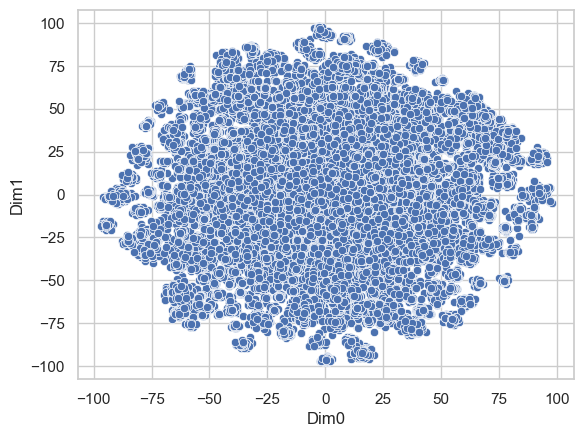

In [114]:
sns.scatterplot(data=df_tsne_tfidf,
                x="Dim0",
                y="Dim1",
                )

In [115]:
df_tot_tfidf = pd.concat([df_tfidf, df_tsne_tfidf], axis = 1)
df_tot_tfidf.to_csv('C:/Users/A475388/Notebooks/IML P5/Data/df_tot_tfidf.csv',
          sep=';',
          header=True,
          index=False) #pour ne pas avoir la 1ère colonne au rechargement